# Text Analysis of Titles Descriptions and Tags

In [1]:
import pandas as pd
import numpy as np
import re
import datetime  
import matplotlib.pyplot as plt

#natural language toolkit for list of stop words
import nltk 
#nltk.download('stopwords')
from nltk.corpus import stopwords

In [2]:
data = pd.read_csv('data/mergedData041022.csv')

## Titles and Descriptions

In [3]:
#make all title and descriptions lowercase
title = data['title_x'].str.lower()
desc = data['description'].str.lower()

In [4]:
#look at some titles
title.head(5)

0                                      matte black mug
1    sample / second sale - 11 oz handmade ceramic ...
2    8 oz / 11 oz / 14 oz handmade ceramic mug, sto...
3    3 oz handmade ceramic espresso cup, sake cup, ...
4    13 oz / 15 oz handmade ceramic mug, stoneware ...
Name: title_x, dtype: object

In [5]:
#look at some descriptions
desc.head(5)

0    matte black mug, perfect for your morning coff...
1    --sample / second sale for handmade stoneware ...
2    handmade stoneware mugs for coffee or tea or s...
3    a handmade stoneware tumbler for espresso, sak...
4    handmade stoneware cups for coffee or tea.\n\n...
Name: description, dtype: object

### Looking at listings that contain specific products of interest

In [6]:
# function that returns percentage of listings that contain a specific word

def percentage_item(text, word):
    true = text[text.str.contains(' ' + word + ' ')==True]
    percent = len(true)/len(text)
    return percent

In [7]:
#percentage of listings that contain the word "mug" in the TITLE
percentage_item(title, "mug")

0.12983333333333333

In [8]:
#percentage of listings that contain the word "mug" in the DESCRIPTION
percentage_item(desc, "mug")

0.18941666666666668

In [9]:
#percentage of listings that contain a specific product in their title and description

items = ['mug', 'plate', 'bowl', 'jar', 'planter', 'berry bowl', 'butter dish', 'cup', 'tumbler', 'bacon cooker', 'spoon rest']

for i in items:
    print(i, percentage_item(title, i), percentage_item(desc, i))


mug 0.12983333333333333 0.18941666666666668
plate 0.023083333333333334 0.04841666666666666
bowl 0.07775 0.1315
jar 0.013416666666666667 0.018
planter 0.01425 0.017083333333333332
berry bowl 0.001 0.001
butter dish 0.00225 0.0025
cup 0.06833333333333333 0.10633333333333334
tumbler 0.008416666666666666 0.016083333333333335
bacon cooker 0.0 0.00025
spoon rest 0.005833333333333334 0.012583333333333334


### Remove punctuation, special characters and stop words from the titles and descriptons

In [10]:
# function that removes "\n", links, as well as special characters and numbers fromt text
def clean_text(text):
    for i in range (0, len(text)):
        n = '\n'
        string = text[i]
        if n in string:
            string = string.replace(n, " ")
            text[i] = string
        text[i] = re.sub("[^A-za-z]+"," ", text[i])
        text[i] = re.sub(r"http\S+","",text[i])
        text[i] = re.sub(r"www\S+","",text[i])

In [11]:
# Clean descriptions and titles
clean_text(desc)
clean_text(title)

In [12]:
#split the title strings on the spaces
title = title.str.split(" ")
desc = desc.str.split(" ")

In [13]:
## define the stopwords
stop = stopwords.words('english')

In [14]:
#add pottery-related keywords, and other irrelevant words to stopwords
stop.extend(['handmade','stoneware','pottery','ceramic','clay','x', '|','cm', 'oz', 'ml', ' ', '', 'www', 'com',
'shipping','item','items','hand','made','piece','pieces','make','please','one','use','may','inches','also',
'high','etsy', 'quot'])

In [15]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### TO DO: GET THIS FUNCTION TO WORK 
I dont know if this is worth the time to fix, maybe just keep the for loops for now

In [16]:
#### TO DO: Turn this into a function (This function isn't working, fix later)
""" 
Args:
txt (series): the text as a series of lists
wrds (list): the stopwords to be removed from the list


"""
def remove_stopwords(txt, wrds):
    txt = txt.reset_index(drop=True) #reset the index
    for i in range (0, len(txt)):
        for s in wrds:
            list = txt[i]
            list = [w for w in list if w != s]
            txt[i] = list

In [17]:
#test = desc.iloc[11995:]
#test = test.reset_index(drop=True)

### Keeping these here for now but I really want the function to work with everything

In [18]:
# remove all instances of the stop words from the descriptions
for i in range (0, len(desc)):
    for s in stop:
        list = desc[i]
        list = [w for w in list if w != s]
        desc[i] = list

In [19]:
# remove all instances of the stop words from the titles
for i in range (0, len(title)):
    for s in stop:
        list = title[i]
        list = [w for w in list if w != s]
        title[i] = list

In [20]:
desc

0        [matte, black, mug, perfect, morning, coffee, ...
1        [sample, second, sale, mugs, coffee, tea, soup...
2        [mugs, coffee, tea, soup, glazed, inside, outs...
3        [tumbler, espresso, sake, moccha, special, eff...
4        [cups, coffee, tea, glazed, inside, outside, k...
                               ...                        
11995    [bowl, used, keeping, fruits, bread, serve, br...
11996    [consideration, presenting, sale, nice, vintag...
11997    [thrown, jug, incised, design, dip, glazed, tr...
11998    [using, lava, fleck, carved, part, glazed, lea...
11999    [thrown, soap, dish, delightful, creations, wo...
Name: description, Length: 12000, dtype: object

In [21]:
title

0                                      [matte, black, mug]
1        [sample, second, sale, mug, coffee, mug, tea, ...
2                             [mug, coffee, mug, tea, mug]
3                      [espresso, cup, sake, cup, tumbler]
4                             [mug, coffee, mug, tea, mug]
                               ...                        
11995    [plate, legs, organiser, small, fruit, keeper,...
11996    [vintage, art, object, letter, holder, paperwe...
11997    [jug, incised, design, thrown, milk, jug, glaz...
11998                                  [lava, fleck, vase]
11999    [soap, dish, buff, white, gloss, vandranite, g...
Name: title_x, Length: 12000, dtype: object

### Save the cleaned descriptions and titles to csv to use for clustering algorithm

In [22]:
title.to_csv('data/titles-cleaned041022.csv')
desc.to_csv('data/descriptions-cleaned041022.csv')

### Word Counts

In [23]:
#define a function that reduces a column to a 1-dimensional series (to get word counts)
def oneD(column):
 return pd.Series([x for list in column for x in list])

In [24]:
#get the value counts for each of the words in the description
descWordCounts = oneD(desc).value_counts()

In [25]:
#look at top 50 words in the descriptions
top50desc = descWordCounts.head(50).sort_values(ascending=False)
top50desc

safe          10382
glaze          9066
mug            8128
dishwasher     6442
fired          5519
unique         5398
microwave      5262
glazed         5243
food           5111
bowl           5006
shop           4898
wheel          4349
white          3994
free           3985
glazes         3825
thrown         3732
diameter       3700
gift           3497
blue           3418
size           3362
cup            3151
coffee         3097
height         3036
beautiful      3008
small          2994
order          2855
color          2831
perfect        2830
like           2661
contact        2605
tea            2538
see            2529
set            2470
time           2455
tall           2404
kiln           2391
used           2360
mugs           2311
days           2288
oven           2281
green          2267
using          2265
studio         2263
wide           2252
home           2237
note           2186
lead           2127
questions      2077
us             2075
great          2072


In [26]:
#get the value counts for each of the words in the titles
titleWordCounts = oneD(title).value_counts()

In [27]:
#look at top 50 words in the titles
top50title = titleWordCounts.head(50).sort_values(ascending=False)
top50title

mug         6361
bowl        3258
coffee      2720
cup         2317
blue        1582
vase        1513
tea         1499
gift        1483
thrown      1397
set         1338
white       1234
dish        1132
plate        955
green        924
wheel        914
large        879
glaze        805
small        769
unique       728
vintage      687
pot          682
holder       649
black        647
serving      609
rustic       600
glazed       565
decor        513
ceramics     505
brown        499
spoon        492
art          490
jar          485
bowls        469
flower       429
planter      417
mugs         415
design       411
modern       410
soap         402
home         402
speckled     375
jug          375
kitchen      366
studio       356
red          348
cups         347
tumbler      345
rest         323
kind         322
painted      321
dtype: int64

## Tags

In [28]:
#make all tags lowercase
data['tags'] = data['tags'].str.lower()

In [29]:
#transform tags column from strings to lists
data['tags'] = data['tags'].apply(eval)

In [30]:
#look at the tags
data['tags']

0        [coffee, mug, ceramic, handmade, stoneware, sc...
1        [ceramic mug, coffee mug, tea mug, ceramic cof...
2        [handmade ceramic mug, handmade mug, ceramic m...
3        [handmade cup, espresso cup, ceramic espresso ...
4        [handmade mug, ceramic mug, handmade ceramic m...
                               ...                        
11995    [light blue crackle, lithuanian art, rustic an...
11996    [vintage, handmade, glazed, 60s, 70s, green, b...
11997    [pottery jug, ceramic jug, small handmade jug,...
11998    [vase, contemporary, handmade, ceramic, stonew...
11999    [anniversary present, mum mother gift, circle ...
Name: tags, Length: 12000, dtype: object

In [31]:
#get just the tags
tags = data['tags']

### Remove pottery-related stopwords from the tags

In [32]:
#define common stopwords
stopTags = ['handmade','stoneware','pottery','ceramic','clay','handmade pottery','stoneware pottery','ceramics','handmade ceramics']

In [33]:
#remove stop words from tags
for i in range (0, len(tags)):
    for s in stopTags:
        tags_list = tags[i]
        if s in tags_list:
            tags_list.remove(s)

In [34]:
#add clean tags to original df
data['clean_tags'] = tags
data['clean_tags']

0        [coffee, mug, scandinavian, craft, black, hand...
1        [ceramic mug, coffee mug, tea mug, ceramic cof...
2        [handmade ceramic mug, handmade mug, ceramic m...
3        [handmade cup, espresso cup, ceramic espresso ...
4        [handmade mug, ceramic mug, handmade ceramic m...
                               ...                        
11995    [light blue crackle, lithuanian art, rustic an...
11996    [vintage, glazed, 60s, 70s, green, brown, lett...
11997    [pottery jug, ceramic jug, small handmade jug,...
11998    [vase, contemporary, home decor, anniversary, ...
11999    [anniversary present, mum mother gift, circle ...
Name: clean_tags, Length: 12000, dtype: object

In [35]:
#get the value counts for each of the tags
tagCounts = oneD(tags).value_counts()

In [36]:
#look at top 50 tags
top50 = tagCounts.head(50).sort_values(ascending=False)
top50

coffee mug              1051
stoneware mug           1006
mug                      978
gift                     876
pottery mug              828
handmade mug             796
ceramic mug              795
coffee cup               649
wheel thrown             642
cup                      639
blue                     567
bowl                     546
coffee                   545
kitchen                  508
unique                   504
tea mug                  495
home decor               487
one of a kind            486
tea cup                  474
vase                     442
housewarming gift        419
tea                      395
ceramic bowl             386
handmade ceramic         372
tableware                360
white                    351
rustic                   348
green                    346
stoneware bowl           343
handmade bowl            325
studio pottery           296
handmade pottery mug     275
vintage                  274
gift for her             269
ceramic cup   

In [37]:
# the word "spoon" is appearing in the top words in the titles so I wanted to see what the related product is:
tagCounts[tagCounts.index.str.contains(pat = 'tumbler')]

tumbler                 160
ceramic tumbler         109
handmade tumbler         67
coffee tumbler           53
pottery tumbler          32
                       ... 
bird tumbler              1
artistic tumbler          1
white coffee tumbler      1
viking tumbler            1
espresso tumbler set      1
Length: 114, dtype: int64

I repeated the above for all the top words in the titles that were products so I could see if they were normally used in a phrase like

Text(0.5, 1.0, 'Frequency of Top 50 Tags')

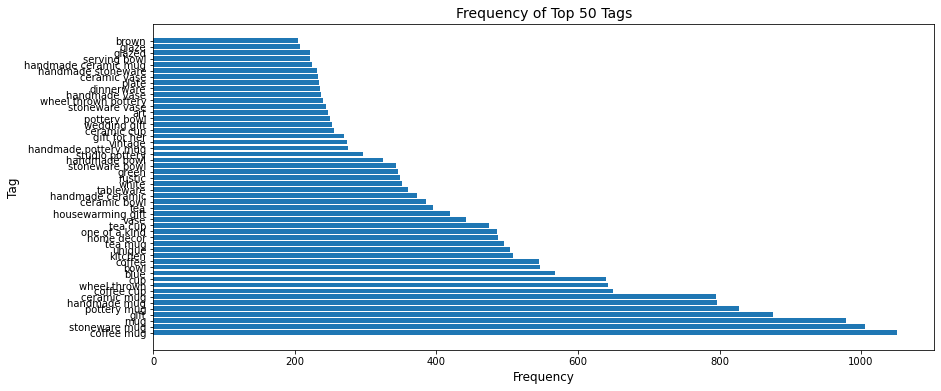

In [38]:
#Plot the top tags
fig, ax = plt.subplots(figsize = (14,6))
ax.barh(top50.index,top50.values)
ax.set_ylabel("Tag", size = 12)
ax.set_xlabel("Frequency", size = 12)
ax.set_title("Frequency of Top 50 Tags", size = 14)

### Get top 20 tags for top-favorited and top number-sold listings

In [39]:
#dataframe with tags, num of favorites
itemData = data[['listing_id','clean_tags','num_favorers_x']]

In [40]:
#look at top 20 listings according to number of favorers
itemData.sort_values(by = ['num_favorers_x'], ascending = False).head(20)

,listing_id,clean_tags,num_favorers_x
3619,175789619,"[best selling mug, gift under 50, gift for dad...",26530
1891,792180615,"[ceramic mug, handpainted mug, nature mug, flo...",13605
946,900330801,"[wheel thrown pottery, fine art ceramics, dini...",13324
2300,1086863643,"[caffeine addict, coffee lover, gift for mom, ...",10564
10767,535025569,"[coffee cup, parceline, tea cup, coffee mug, c...",9678
2,741218574,"[handmade ceramic mug, handmade mug, ceramic m...",8344
40,677424431,"[handmade coffee mug, birthday gift mug, coffe...",7948
451,128982522,"[etsymudteam, claylicious, stoneware berry bow...",7939
4253,1112309379,"[handmade mug, stoneware mug, home decor, cera...",7910
5647,151354984,"[cup, teacup, roses, dots, pink, light blue, m...",7476


In [41]:
#this is the 3,873 listings with at least 10 favorers
TenOrMore = itemData[itemData['num_favorers_x']>=10]
#TenOrMore.shape

In [42]:
#get the value counts for each of the tags in TenOrMore
tagCountsFavs = oneD(TenOrMore["clean_tags"]).value_counts()
top20Favs = tagCountsFavs.head(20).sort_values(ascending=True)

Text(0.5, 1.0, 'Top 20 Tags for Listings With at Least 10 Favorites')

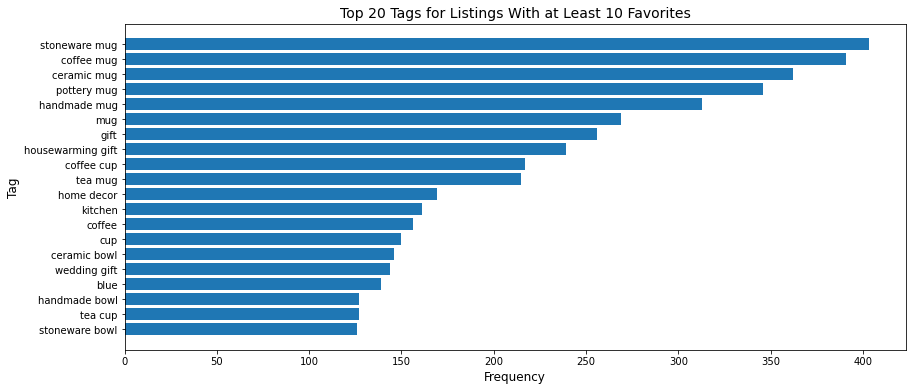

In [43]:
#create the bar chart
fig, ax = plt.subplots(figsize = (14,6))
ax.barh(top20Favs.index,top20Favs.values)
ax.set_ylabel("Tag", size = 12)
ax.set_xlabel("Frequency", size = 12)
ax.set_title("Top 20 Tags for Listings With at Least 10 Favorites", size = 14)

### Get top 20 tags for top-rated shops

In [44]:
#dataframe with tags, shop review count, and review average
shopData = data[['listing_id','clean_tags','num_favorers_x','review_average', 'review_count']]

In [45]:
shopData.sort_values(by = ['review_average'], ascending = False).head(20)

,listing_id,clean_tags,num_favorers_x,review_average,review_count
5863,976869103,"[welsh studio pottery, green collie, unique ce...",5,5.0,91.0
7051,1195333898,"[handmade for home, home gifts, gifts for him,...",1,5.0,21.0
7096,1048777712,"[vase, nature, mid-century inspired, hand-made...",2,5.0,6.0
7085,1118385976,"[interior design, porcelain, sculpture, contem...",6,5.0,2.0
7084,1118396450,"[interior design, porcelain, sculpture, contem...",2,5.0,2.0
7083,1132353905,"[interior design, porcelain, sculpture, contem...",3,5.0,2.0
7082,1132341845,"[interior design, porcelain, sculpture, contem...",5,5.0,2.0
7081,1121238950,"[interior design, porcelain, sculpture, contem...",4,5.0,2.0
7080,1121218894,"[interior design, porcelain, sculpture, contem...",3,5.0,2.0
7079,1135148501,"[interior design, porcelain, sculpture, tablew...",2,5.0,2.0


In [46]:
#this is the 9036 listings from shops with at least 10 reviews
TenReviews =  shopData[shopData['review_count']>=10]
#TenReviews

In [47]:
#get the value counts for each of the tags in TenReviews
tagCountsShops = oneD(TenReviews["clean_tags"]).value_counts()
top20Shops = tagCountsShops.head(20).sort_values(ascending=True)

Text(0.5, 1.0, 'Top 20 Tags for Listings from Shops with at Least 10 Reviews')

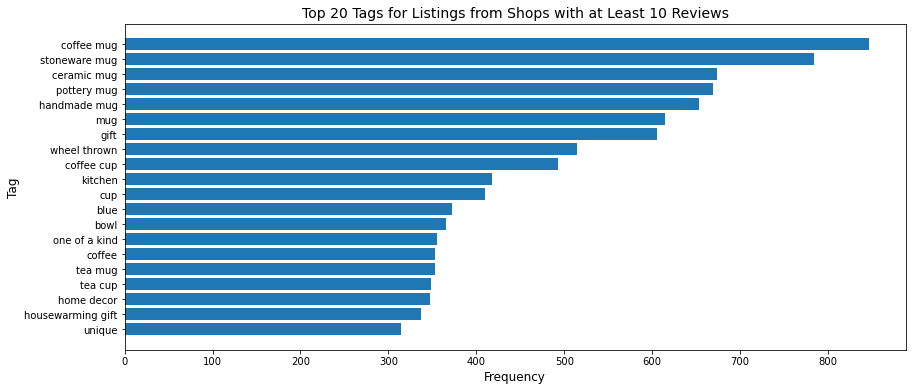

In [48]:
#create the bar chart
fig, ax = plt.subplots(figsize = (14,6))
ax.barh(top20Shops.index,top20Shops.values)
ax.set_ylabel("Tag", size = 12)
ax.set_xlabel("Frequency", size = 12)
ax.set_title("Top 20 Tags for Listings from Shops with at Least 10 Reviews", size = 14)